In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [2]:
df=pd.read_csv('c:/python/y_train.csv')
df_1=pd.read_csv('c:/python/y_test.csv')
y_dic=df['y'].to_numpy()
y_dic
y_dic_1=df_1['y'].to_numpy()

In [3]:
import glob 
from PIL import Image

TRAIN_DIR="c:/python/train_fig/train_fig"
TEST_DIR="c:/python/test_fig/test_fig"

def load_data():
    file_list = glob.glob(TRAIN_DIR + "/*.jpg")
    x = []
    y = []
    
    for fname in file_list:
        with Image.open(fname) as img:
            np_img = np.array(img)
        label = int(fname[-8:-4]) 

        x.append(np_img)
        y.append(y_dic[label])
        
    x, y = np.array(x), np.array(y)
    x = np.expand_dims(x, -1)
    x = x / 255.
    return x, y
    
X_train, y_train = load_data()

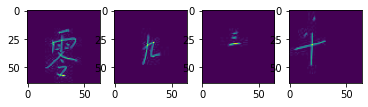

In [4]:
import matplotlib.pyplot as plt
plt.subplot(141)
plt.imshow(X_train[0].squeeze(2))
plt.subplot(142)
plt.imshow(X_train[1].squeeze(2))
plt.subplot(143)
plt.imshow(X_train[2].squeeze(2))
plt.subplot(144)
plt.imshow(X_train[3].squeeze(2))

In [5]:
y_train[0], y_train[1], y_train[2], y_train[3]

(0, 9, 3, 12)

In [6]:
def load_test():
    file_list = glob.glob(TEST_DIR + "/*.jpg")
    x = [] 
    y = []
    for fname in file_list:
        with Image.open(fname) as img:
            np_img = np.array(img)
        label = int(fname[-8:-4]) 

        x.append(np_img)
        y.append(y_dic_1[label])
        
    x, y = np.array(x), np.array(y)
    x = np.expand_dims(x, -1)
    x = x / 255.
    return x, y
    
X_test, y_test = load_test()

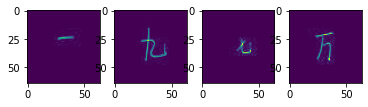

In [7]:
import matplotlib.pyplot as plt
plt.subplot(141)
plt.imshow(X_test[0].squeeze(2))
plt.subplot(142)
plt.imshow(X_test[1].squeeze(2))
plt.subplot(143)
plt.imshow(X_test[2].squeeze(2))
plt.subplot(144)
plt.imshow(X_test[3].squeeze(2))

In [8]:
from tensorflow import keras
from keras import models 
from keras import layers

Using TensorFlow backend.


In [9]:
from keras.utils import to_categorical

y_train=to_categorical(y_train)
X_train = X_train.reshape((10000, 64, 64, 1))

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization,LeakyReLU
modelc = models.Sequential()
modelc.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 1)))
modelc.add(layers.Conv2D(16, (3, 3), activation='relu'))
modelc.add(layers.MaxPooling2D((2, 2)))
modelc.add(layers.Dropout(0.5))
modelc.add(layers.Conv2D(16, (3, 3), activation='relu'))
modelc.add(layers.Conv2D(16, (3, 3), activation='relu'))
modelc.add(layers.Dropout(0.5))
modelc.add(layers.Flatten())
modelc.add(layers.Dense(15, activation='softmax'))
modelc.summary()

modelc.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 62, 62, 16)        160       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 60, 60, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 26, 26, 16)        2320      
_________________________________________________________________
dropout_6 (Dropout)          (None, 26, 26, 16)       

In [25]:
cepochs = 50
historyc = modelc.fit(X_train, y_train, epochs=cepochs, batch_size=32, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 78s 10ms/step - loss: 1.6494 - accuracy: 0.4874 - val_loss: 0.8814 - val_accuracy: 0.7275
Epoch 2/50
8000/8000 [==============================] - 74s 9ms/step - loss: 0.7920 - accuracy: 0.7498 - val_loss: 0.5633 - val_accuracy: 0.8320
Epoch 3/50
8000/8000 [==============================] - 79s 10ms/step - loss: 0.5309 - accuracy: 0.8276 - val_loss: 0.4132 - val_accuracy: 0.8720
Epoch 4/50
8000/8000 [==============================] - 81s 10ms/step - loss: 0.4082 - accuracy: 0.8627 - val_loss: 0.3711 - val_accuracy: 0.8970
Epoch 5/50
8000/8000 [==============================] - 75s 9ms/step - loss: 0.3358 - accuracy: 0.8865 - val_loss: 0.2918 - val_accuracy: 0.9105
Epoch 6/50
8000/8000 [==============================] - 85s 11ms/step - loss: 0.2823 - accuracy: 0.9057 - val_loss: 0.2560 - val_accuracy: 0.9300
Epoch 7/50
8000/8000 [==============================] - 79s 10ms/step - loss: 

In [13]:
from sklearn import metrics
from keras import optimizers
from keras.initializers import Constant
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization,LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical
from keras.layers.advanced_activations import LeakyReLU, PReLU

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import tensorflow as tf
model=Sequential()

model.add(Conv2D(filters = 64, kernel_size=(3,3), input_shape=(64, 64, 1), padding='same'))
model.add(PReLU(alpha_initializer=Constant(value=0.25)))
model.add(MaxPool2D(2))


model.add(Conv2D(filters = 128, kernel_size=(3,3), padding='same'))
model.add(PReLU(alpha_initializer=Constant(value=0.25)))
model.add(MaxPool2D(2))


model.add(Conv2D(filters = 160, kernel_size=(3,3),  padding='same'))
model.add(PReLU(alpha_initializer=Constant(value=0.25)))
model.add(MaxPool2D(2))


model.add(Conv2D(filters = 256, kernel_size=(3,3), padding='same'))
model.add(PReLU(alpha_initializer=Constant(value=0.25)))
model.add(Conv2D(filters = 256, kernel_size=(3,3), padding='same'))
model.add(PReLU(alpha_initializer=Constant(value=0.25)))
model.add(MaxPool2D(2))


model.add(Conv2D(filters = 384, kernel_size=(3,3),  padding='same'))
model.add(PReLU(alpha_initializer=Constant(value=0.25)))
model.add(Conv2D(filters = 384, kernel_size=(3,3), padding='same'))
model.add(PReLU(alpha_initializer=Constant(value=0.25)))
model.add(MaxPool2D(2))


model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1024))
model.add(PReLU(alpha_initializer=Constant(value=0.25)))
model.add(Dropout(0.5))
model.add(Dense(15, activation='softmax'))
model.add(PReLU(alpha_initializer=Constant(value=0.25)))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 64)        640       
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 64, 64, 64)        262144    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
p_re_lu_2 (PReLU)            (None, 32, 32, 128)       131072    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 160)      

In [14]:
cepochs = 50
historyc = model.fit(X_train, y_train, epochs=cepochs, batch_size=32, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 636s 79ms/step - loss: 1.4140 - accuracy: 0.4974 - val_loss: 0.3144 - val_accuracy: 0.8840
Epoch 2/50
8000/8000 [==============================] - 506s 63ms/step - loss: 0.2869 - accuracy: 0.9114 - val_loss: 0.3625 - val_accuracy: 0.8990
Epoch 3/50
8000/8000 [==============================] - 502s 63ms/step - loss: 0.1538 - accuracy: 0.9575 - val_loss: 0.0858 - val_accuracy: 0.9715
Epoch 4/50
8000/8000 [==============================] - 503s 63ms/step - loss: 0.1004 - accuracy: 0.9725 - val_loss: 0.1533 - val_accuracy: 0.9555
Epoch 5/50
8000/8000 [==============================] - 506s 63ms/step - loss: 0.2103 - accuracy: 0.9485 - val_loss: 0.1582 - val_accuracy: 0.9600
Epoch 6/50
8000/8000 [==============================] - 501s 63ms/step - loss: 0.1497 - accuracy: 0.9643 - val_loss: 0.4563 - val_accuracy: 0.9265
Epoch 7/50
8000/8000 [==============================] - 506s 63ms/step

KeyboardInterrupt: 